# **Clssification Thyroid Disease**

# Define the Problem

The primary purpose of this stage is to improve our comprehension of the obstacles biomedical researchers encounter, particularly in studying thyroid disease, which is one of the most rapidly worsening endocrine diseases in the modern human population. In order to better comprehend the current problem and devise solutions, we conducted a collection of evaluated articles based on this topic and feature optimization on the small dataset.

This project aims to **optimize features** and **handle missing values** and 
**imbalanced classes** by using four classifiers algorithms to classify patients with different thyroid-related diseases given their age, sex, and medical information – including test results for thyroid hormone levels in the blood. The data was obtained from this UCI machine learning repository. The repository contains several text files with different subsets of data. One has information for ~9000 unique patients and a medical diagnosis out of 20 possible classes. Those classes make up seven distinct diagnosis types:

Moving forward with the analysis, it has been decided to only keep the observations for patients with either negative, hyperthyroid, or hypothyroid diagnoses. This is because they are the project's most general observations and focus. The other classes were dropped from the dataset upon import; thus, we are left with ~8500 unique entries.

# Importing the libraries





In [ ]:
import numpy as np 
import pandas as pd # data processing, CSV file 
import seaborn as sns #  visualization library
import matplotlib.pyplot as plt # visualization library
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.impute import KNNImputer
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis
from sklearn import model_selection
import lightgbm as lgb
# Import catboost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import warnings
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.8 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Step 1: Select dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*  In this project we will use the dataset related to thyroid disease, which can be downloaded from this link [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/thyroid+disease).

*   using the pandas library to import data and convert them into a dataframe. Through the head(10) method we print only the first 10 rows of the dataset

In [ ]:
thyroid =  pd.read_csv('/content/drive/MyDrive/Datasets/thyroid.csv')
thyroid

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
thyroid.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Columns: 31 entries, age to patient_id
dtypes: float64(6), int64(2), object(23)
memory usage: 12.3 MB


In [ ]:
for col in thyroid.columns:
        col_type = thyroid[col].dtype
        
        if col_type != object:
            c_min = thyroid[col].min()
            c_max = thyroid[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    thyroid[col] = thyroid[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    thyroid[col] = thyroid[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    thyroid[col] = thyroid[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    thyroid[col] = thyroid[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    thyroid[col] = thyroid[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    thyroid[col] = thyroid[col].astype(np.float32)
                else:
                    thyroid[col] = thyroid[col].astype(np.float64)
        else:
            thyroid[col] = thyroid[col].astype('category')

In [ ]:
thyroid.info(verbose=False, memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Columns: 31 entries, age to patient_id
dtypes: category(23), float16(6), int32(2)
memory usage: 393.3 KB


# Step 2: Perform data preparation & cleaning

## 2.1: Preliminary Data Processing

* To start off, we read our dataset and generate a simple preview and statistics of our data.



In [ ]:
thyroid.info()
thyroid.head()
print('')
print('Featurs          Missing Value')
print('------------------------------')
thyroid.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  9172 non-null   int32   
 1   sex                  8865 non-null   category
 2   on_thyroxine         9172 non-null   category
 3   query_on_thyroxine   9172 non-null   category
 4   on_antithyroid_meds  9172 non-null   category
 5   sick                 9172 non-null   category
 6   pregnant             9172 non-null   category
 7   thyroid_surgery      9172 non-null   category
 8   I131_treatment       9172 non-null   category
 9   query_hypothyroid    9172 non-null   category
 10  query_hyperthyroid   9172 non-null   category
 11  lithium              9172 non-null   category
 12  goitre               9172 non-null   category
 13  tumor                9172 non-null   category
 14  hypopituitary        9172 non-null   category
 15  psych                

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

*  The output shows we have around 9000 entries with 28 columns.  Null values and some of the columns’ data types should be changed. As we shall see later, setting the data types correctly can aid us in our data science processes. In a nutshell, there are two common data types (categorical and numeric ). Many values have been missed, and we will handle them.



## 2.2: Remapping target
* In this step we will re-mapping target vaues to diagnostic groups 
* The diagnosis consists of a string of letters indicating diagnosed conditions.
    A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
    form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
    conditions are divided into groups where each group corresponds to a class of
    comments [more information](https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data).
*  Remapping the target attribute by grouping the patient into two types of thyroid, such as negative and positive. 


In [ ]:
#  re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

thyroid['target'] = thyroid['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
thyroid.dropna(subset=['target'], inplace=True) 

# dataset initial summary
thyroid.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  7546 non-null   int32   
 1   sex                  7296 non-null   category
 2   on_thyroxine         7546 non-null   category
 3   query_on_thyroxine   7546 non-null   category
 4   on_antithyroid_meds  7546 non-null   category
 5   sick                 7546 non-null   category
 6   pregnant             7546 non-null   category
 7   thyroid_surgery      7546 non-null   category
 8   I131_treatment       7546 non-null   category
 9   query_hypothyroid    7546 non-null   category
 10  query_hyperthyroid   7546 non-null   category
 11  lithium              7546 non-null   category
 12  goitre               7546 non-null   category
 13  tumor                7546 non-null   category
 14  hypopituitary        7546 non-null   category
 15  psych                

## 2.3: Replacing string to binary

In [ ]:
# replacing boolean strings with binary 0 and 1
thyroid.replace('f', 0, inplace=True)
thyroid.replace('t', 1, inplace=True)

# replacing sex with binary 0 and 1
thyroid.replace('M', 0, inplace=True) # male mapped to 0
thyroid.replace('F', 1, inplace=True) # female mapped to 1



In [ ]:
# re-mapping target vaues to diagnostic groups
# *** I get different final results by ordering these classes differently ***
patient = {'negative': 0,
           'hyperthyroid': 1,
           'hypothyroid': 2}

thyroid['target'] = thyroid['target'].map(patient) # re-mapping

thyroid['target'].value_counts()

0    6771
2     593
1     182
Name: target, dtype: int64

In [ ]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7546 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  7546 non-null   int32   
 1   sex                  7296 non-null   category
 2   on_thyroxine         7546 non-null   category
 3   query_on_thyroxine   7546 non-null   category
 4   on_antithyroid_meds  7546 non-null   category
 5   sick                 7546 non-null   category
 6   pregnant             7546 non-null   category
 7   thyroid_surgery      7546 non-null   category
 8   I131_treatment       7546 non-null   category
 9   query_hypothyroid    7546 non-null   category
 10  query_hyperthyroid   7546 non-null   category
 11  lithium              7546 non-null   category
 12  goitre               7546 non-null   category
 13  tumor                7546 non-null   category
 14  hypopituitary        7546 non-null   category
 15  psych                

##2.5: Missing Values Analysis

In [ ]:
# calculating missingess of entire DF
missingness = thyroid.isnull().sum().sum() / thyroid.count().sum()
print('Overall Missingness of thyroid is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)* 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(thyroid).head(15)

Overall Missingness of thyroid is: 5.49%


,Total,Percent
TBG,7287,96.567718
T3,2209,29.273787
TSH,722,9.567983
T4U,676,8.958389
FTI,669,8.865624
TT4,354,4.691227
sex,250,3.313014
age,0,0.000000
TSH_measured,0,0.000000
target,0,0.000000


The missing value concern was calculated. The customized function above takes a data frame as input, counts missing values per column, estimates the percent of missing values, and summarises the data in an output data frame.



*   Our dataset is 5.49% missing.

*   This seems problematic, but the TBG column appears to be almost empty. We knew we'd drop this early in the study but retained it for experimentation.
*   29.27% of T3 is missing, It may be best to eliminate this missing data. Still, we can't ignore the column that T3 is a significant predictor for thyroid disease. So, going ahead, we'll attribute this information.
*   9.56% of TSH is missing and this should be imputed in the future.
*   T4U has 8.95% missing data.
*   FTI is 8.86% missing and a strong candidate for imputation.
*   TT4 has 4.69% missing data, making it a strong candidate for imputation.
*   sex is our most missing column at 3.31%. Depending on how essential it is for modelling, we will impute it.
*   age 0.053% has missing value.






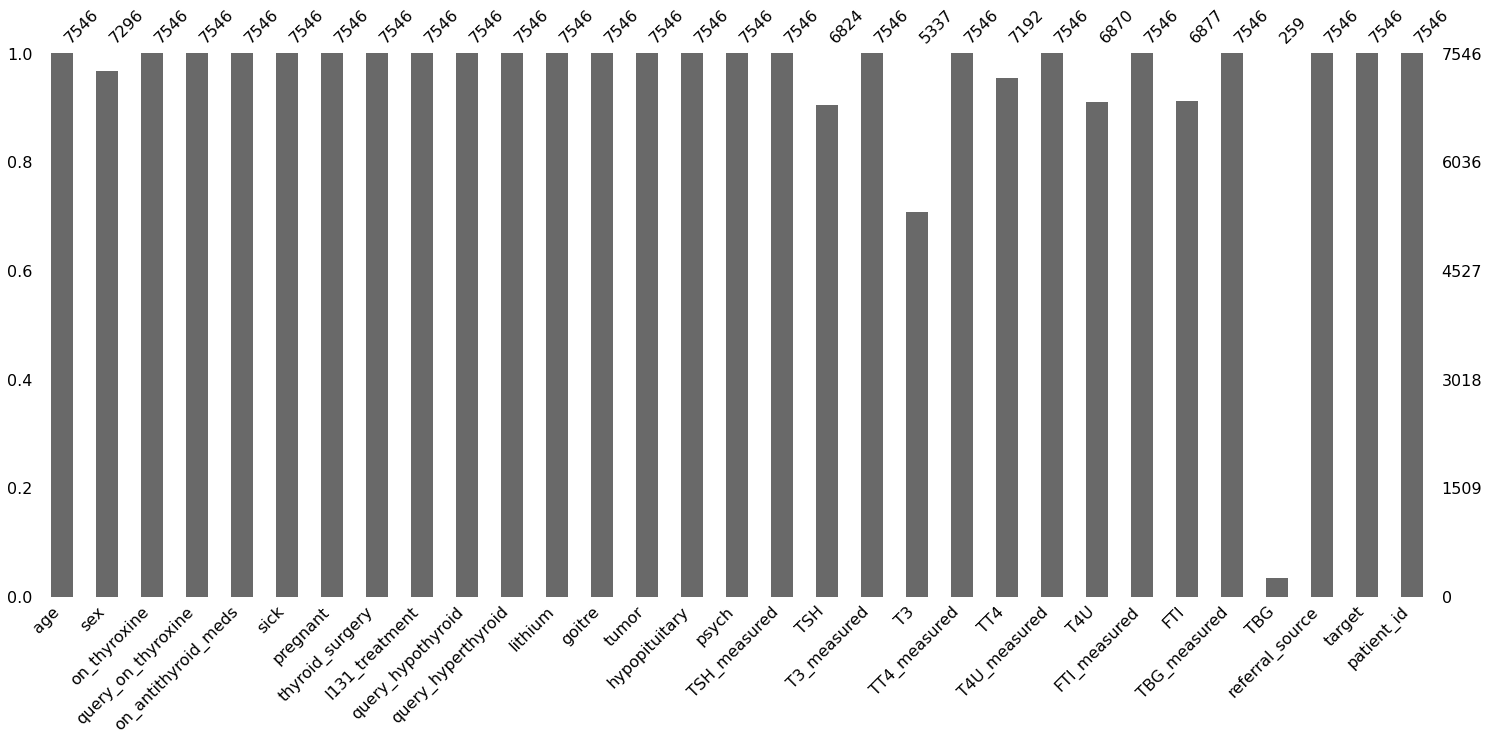

In [ ]:

msno.bar(thyroid)

###2.5.1: Impute Missing Value by (KNN)

*  Euclidean Distance Formula for imputing the missing values 


   
$ d(x,y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2 }  $



In [ ]:
imp_knn = KNNImputer(n_neighbors=5)
thyroid[['sex','age','TSH','T3','TT4','T4U','FTI']]=imp_knn.fit_transform(thyroid[['sex','age','TSH','T3','TT4','T4U','FTI']])

In [ ]:
thyroid[['sex','age','TSH','T3','TT4','T4U','FTI']].to_csv('test.csv')

## 2.6: Drop Irrelated Features




In [ ]:
thyroid.drop(['patient_id', 'referral_source','TBG'], axis=1, inplace=True)

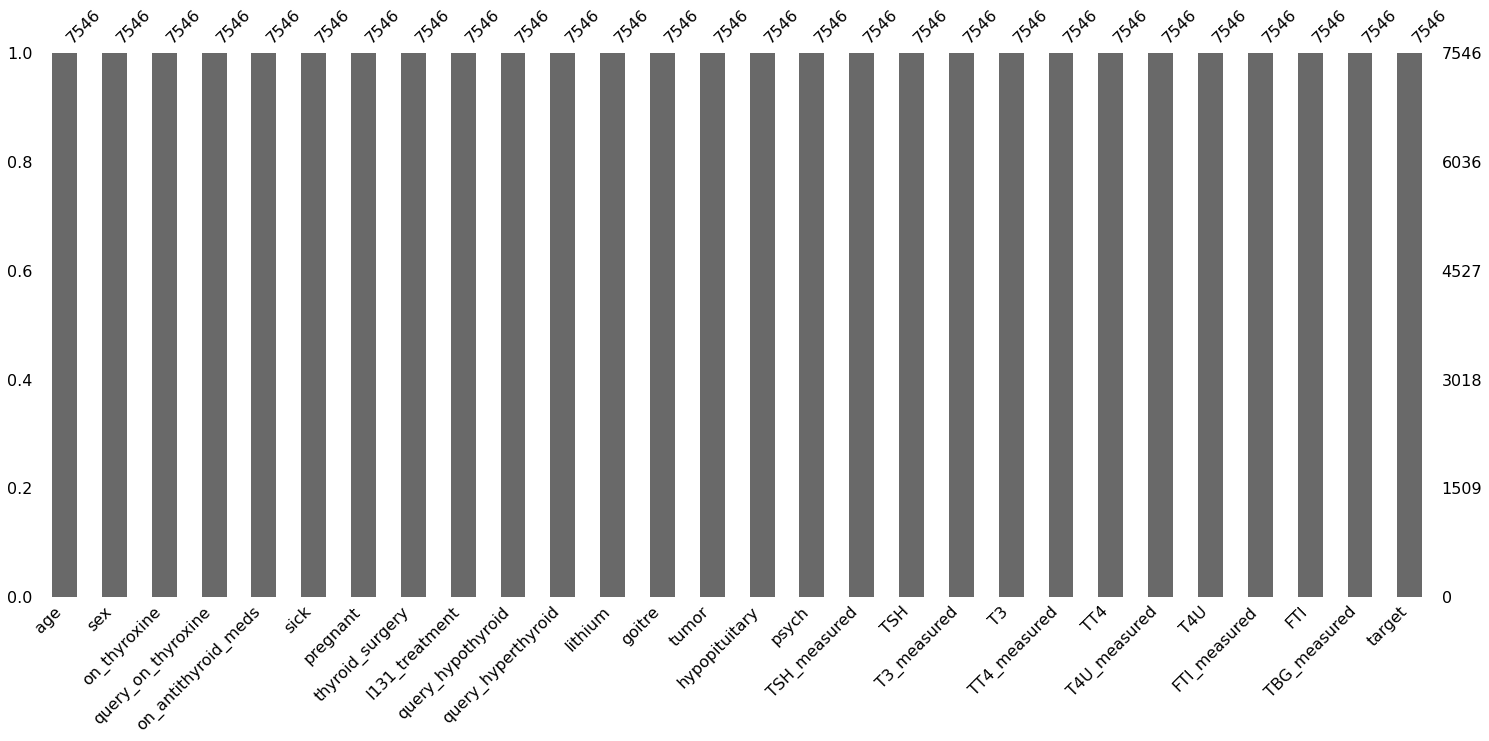

In [ ]:
msno.bar(thyroid)

## 2.7: check the Duplicate
* We will check the duplicate value because one of the significant challenges with data today is the same data. Data aggregation and human typing errors are some sources of exact data. For more to know reasons how duplicate data harms on business [more](https://hevodata.com/learn/duplicate-data/)



In [ ]:

if len(thyroid[thyroid.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(thyroid[thyroid.duplicated()]))
    print(thyroid[thyroid.duplicated(keep=False)].sort_values(by=list(thyroid.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  76
       age  sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
1350  15.0  0.0            0                  0                   0    0   
2608  15.0  0.0            0                  0                   0    0   
2347  15.0  1.0            0                  0                   1    0   
2904  15.0  1.0            0                  0                   1    0   
2431  19.0  1.0            0                  0                   0    0   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...  \
1350        0               0              0                 0  ...   
2608        0               0              0                 0  ...   
2347        0               0              0                 0  ...   
2904        0               0              0                 0  ...   
2431        0               0              0                 0  ...   

     T3_measured        T3 TT4_measured    TT4 T4U_measured       T4U  \
1350        

* For duplicate entries, we checked that they were indeed duplicated and dropped them by the following code.

In [ ]:
thyroid.drop_duplicates(inplace=True)

##2.8: Prepared data for next step

In [ ]:
print('Feature          Missing Value')
print('------------------------------')
print(thyroid.isnull().sum())
print('--------------------------')
thyroid.info()

Feature          Missing Value
------------------------------
age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH_measured           0
TSH                    0
T3_measured            0
T3                     0
TT4_measured           0
TT4                    0
T4U_measured           0
T4U                    0
FTI_measured           0
FTI                    0
TBG_measured           0
target                 0
dtype: int64
--------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7470 entries, 0 to 9171
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------

* Our dataset is ready for the next step because there are no missing values, object data type, irrelated features, and no duplicates. 

# Step 3: Perform exploratory analysis & visualization

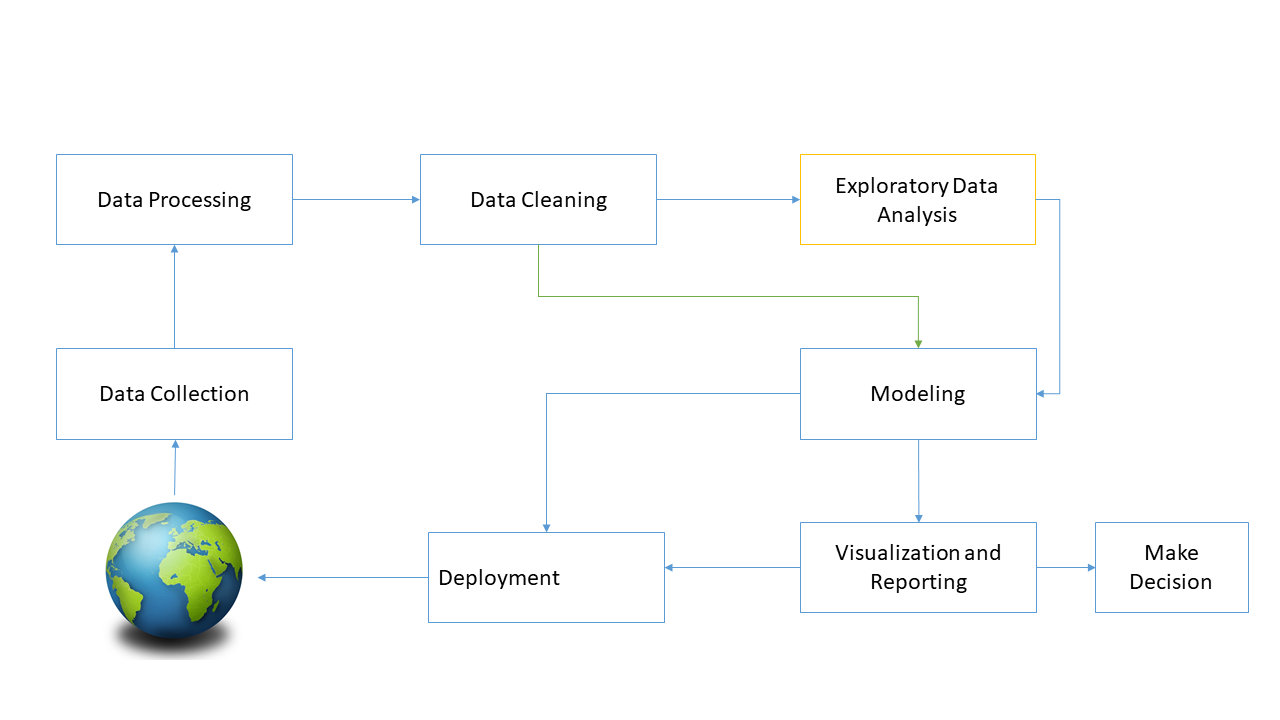

## 3.1: Compute the mean, sum, range and other interesting statistics for numeric columns

In [ ]:
thyroid.describe()

,age,sex,TSH,T3,TT4,T4U,FTI,target
count,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000,7470.000000
mean,51.997001,0.673949,5.467997,2.043456,105.250103,0.967450,110.463557,0.103748
std,18.627986,0.464598,25.103719,0.711576,32.118913,0.157487,35.536161,0.304954
min,1.000000,0.000000,0.005001,0.049988,2.000000,0.189941,1.400391,0.000000
25%,37.000000,0.000000,0.629883,1.700195,88.000000,0.870117,94.000000,0.000000
50%,55.000000,1.000000,1.500000,2.000000,103.000000,0.959961,108.000000,0.000000
75%,67.000000,1.000000,2.800781,2.300781,120.000000,1.049805,124.000000,0.000000
max,97.000000,1.000000,530.000000,18.000000,430.000000,2.119141,839.000000,1.000000


##3.2: Thyroid patient Type Distribution

* To answer the question, what is the difference between negative and positive in the target column? We are using the pie and histogram plots.

******************************
* Thyroid Disease Type Total  *
******************************


0    6695
1     775
Name: target, dtype: int64

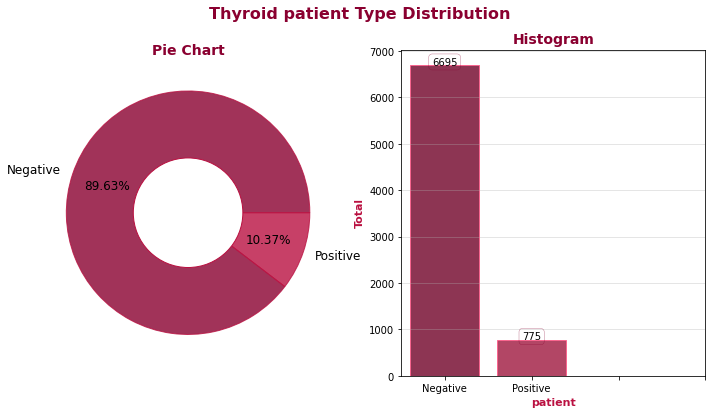

In [ ]:
# --- Setting Colors, Labels, Order ---
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
black_grad  = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
colors=pink_grad[0:4]
labels=['Negative', 'Positive']
order=thyroid['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(12, 6))
plt.suptitle('Thyroid patient Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(thyroid['target'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=thyroid, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('patient', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('*','\033[1m'+'Thyroid Disease Type Total '+'\033[0m','*')
print('*' * 30)
thyroid.target.value_counts(dropna=False)

* According the above chart we can see the number of non thyroid diseas less than the number of the thyroid disease.

* For more knowledge about thyroid disease on gender, we will implement the following code.

In [ ]:
import plotly.graph_objs as go
male = thyroid[thyroid["sex"]==1]
female = thyroid[thyroid["sex"]==0]
male_no = male[thyroid["target"]==0]
male_thyroid = male[thyroid["target"]==1]
female_no = female[thyroid["target"]==0]
female_thyroid = female[thyroid["target"]==1]

labels = ['Male - Not thyroid disease','Male - thyroid disease', "Female - Not thyroid disease", "Female - thyroid disease"]
values = [len(male[thyroid["target"]==0]),len(male[thyroid["target"]==1]),
         len(female[thyroid["target"]==0]),len(female[thyroid["target"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.1 )])
fig.update_layout(
    title_text="Analysis on Thyroid disease and Gender")
fig.show()

<ipython-input-24-cb3e92a13e8a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_no = male[thyroid["target"]==0]
<ipython-input-24-cb3e92a13e8a>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_thyroid = male[thyroid["target"]==1]
<ipython-input-24-cb3e92a13e8a>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_no = female[thyroid["target"]==0]
<ipython-input-24-cb3e92a13e8a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_thyroid = female[thyroid["target"]==1]
<ipython-input-24-cb3e92a13e8a>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = [len(male[thyroid["target"]==0]),len(male[thyroid["target"]==1]),
<ipython-input-24-cb3e92a13e8a>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(female[thyroid["target"]==0]),len(female[thyroid["target"]==1])]


##3.3: Relation between blood test and target

* What is the relation between hormones with the target?

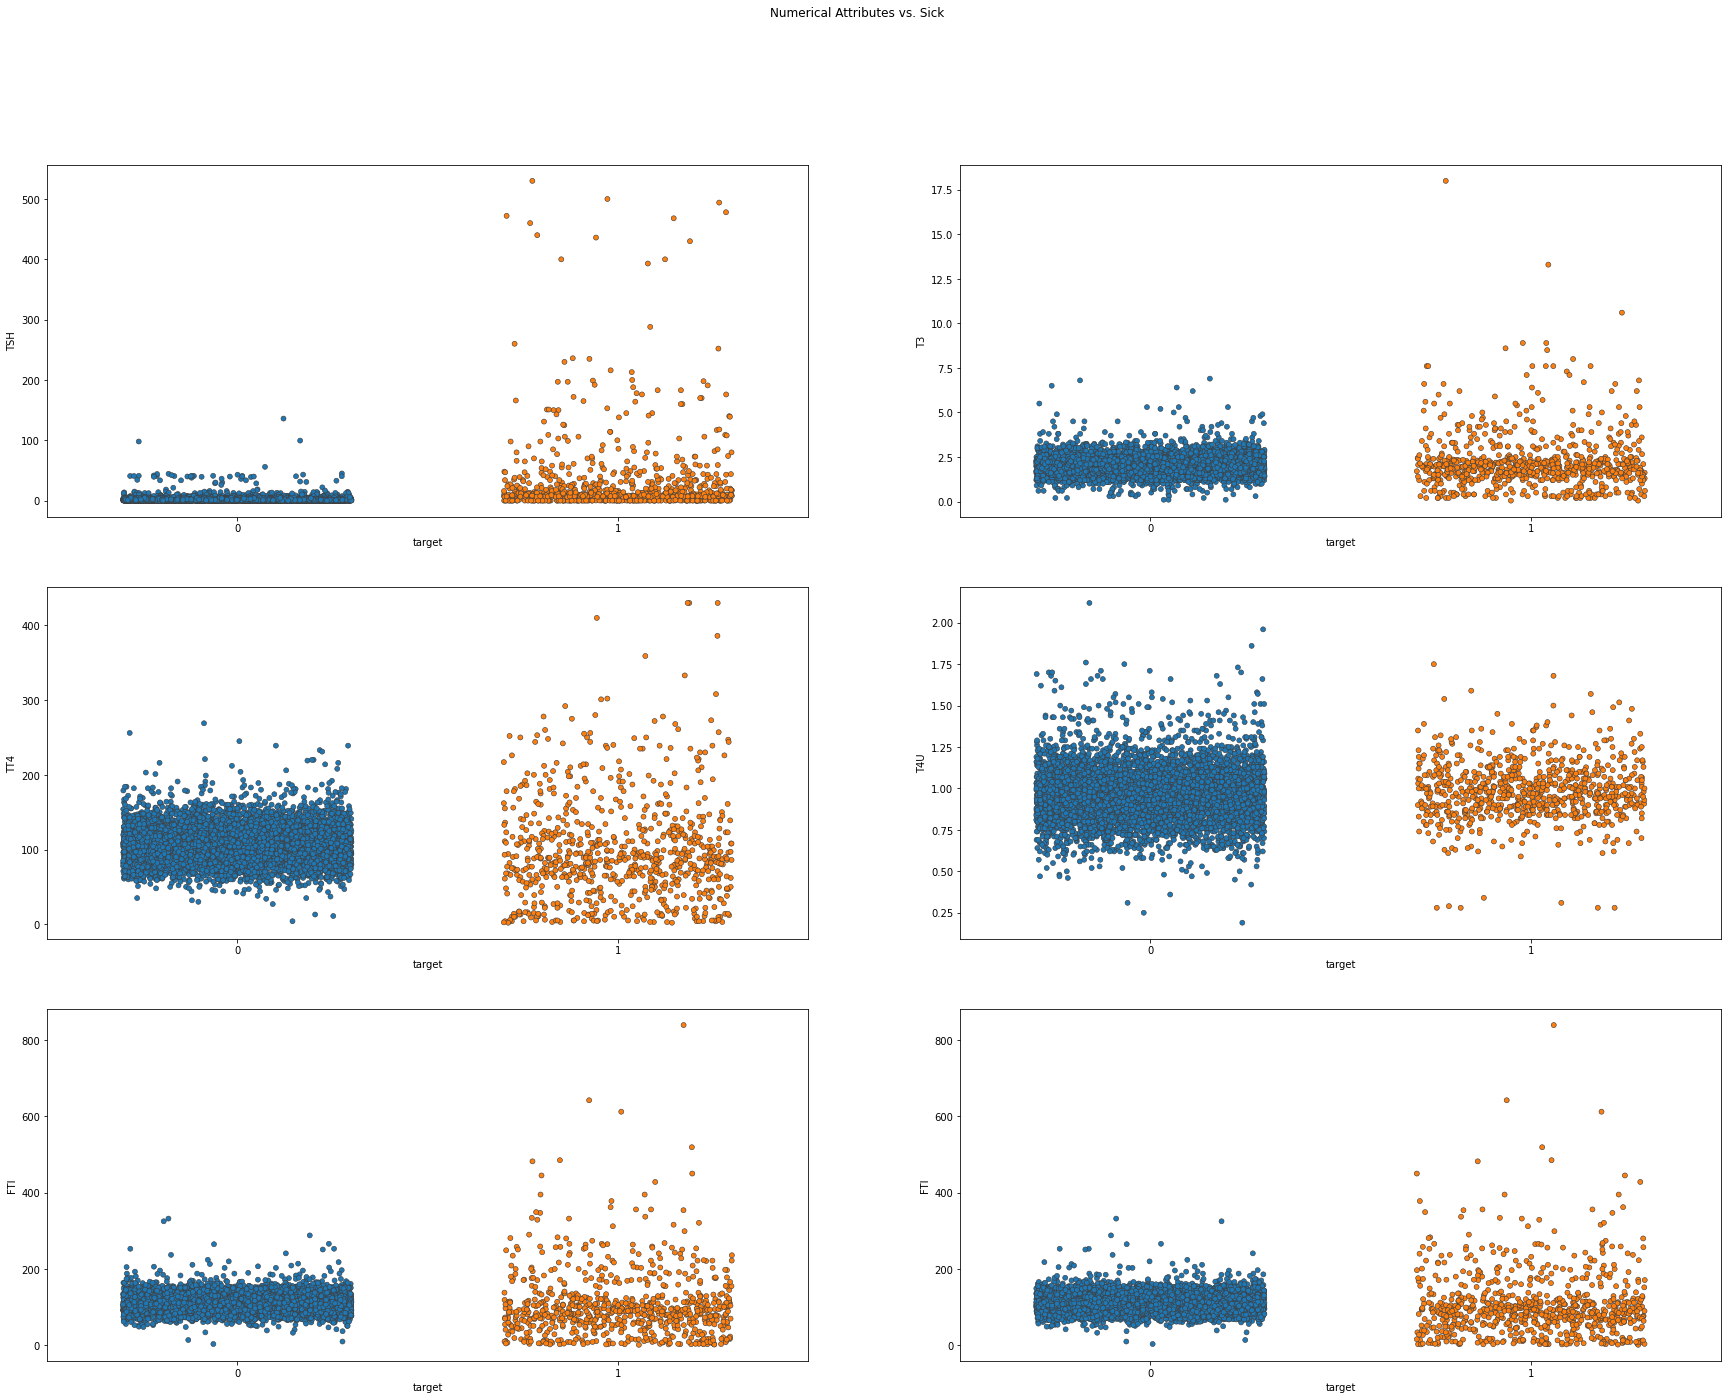

In [ ]:
### setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(30,22))
fig.suptitle('Numerical Attributes vs. Sick')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=thyroid.target, y=thyroid.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2,1])

*  As the above result, we can see the relation between the target and the hormone test, which is essential for classification. for 'target' hypo and analyze the attribute distribution further before making any decisions.

##3.4: Correlation between all attribute


*  We want to observe all correlations between features using a *heatmap*, an old but powerful plot method.

* One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.


1.   Lighter shades represents positive correlation
2.   Darker shades represents negative correlation



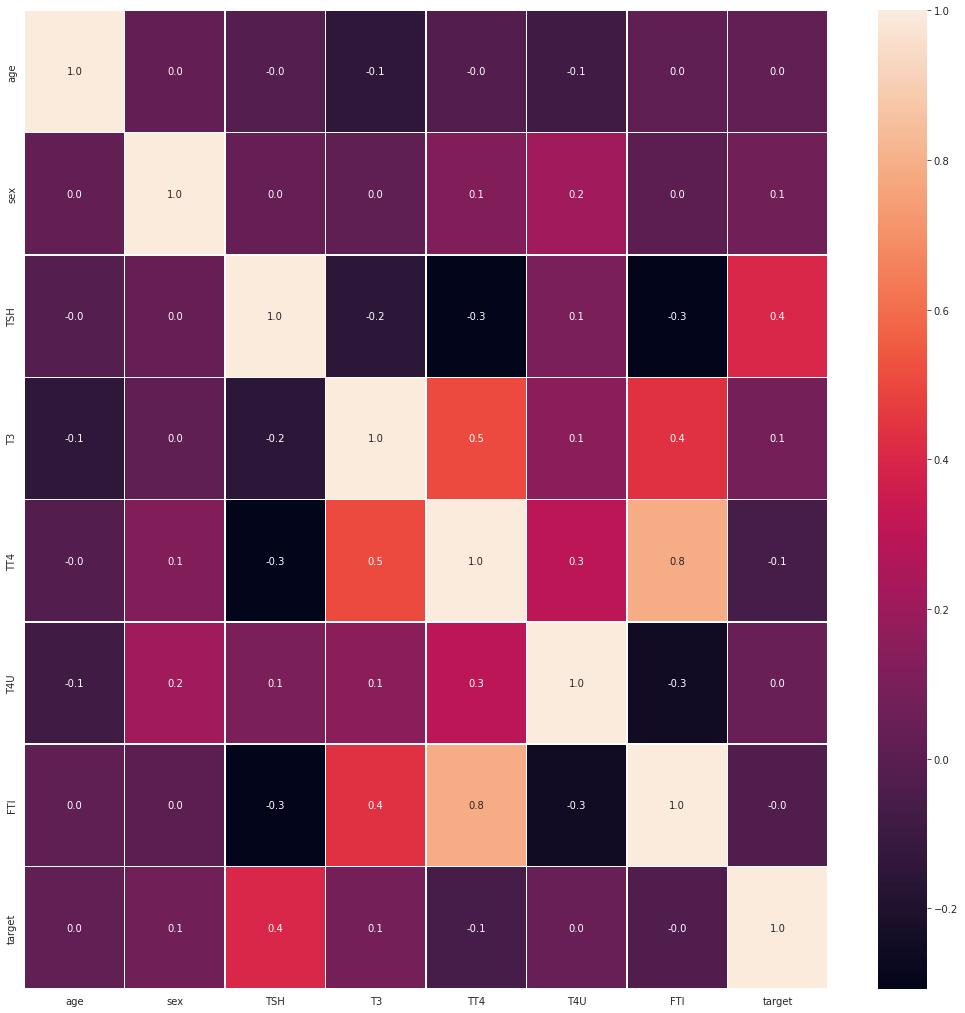

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(thyroid.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# Step 4: Modeling

## Splitting the dataset into the Training set and Test set

In [ ]:
# train and test split --> stratified
X = thyroid.drop('target', axis=1).copy()
y = thyroid['target'].copy()
accuracy_list = []


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5976, 27), (1494, 27), (5976,), (1494,))

##4.1: Cat Boost Classifier

In [ ]:
X_train.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
4905,52.0,1.0,0,0,0,0,0,0,0,0,...,0.029999,0,2.360156,1,163.0,1,0.950195,1,172.0,0
2959,71.0,1.0,0,0,0,0,0,0,0,1,...,1.900391,1,1.500000,1,135.0,1,1.059570,1,127.0,0
344,29.0,1.0,0,0,0,0,0,1,0,0,...,7.300781,1,1.500000,1,90.0,1,1.480469,1,61.0,0
3204,15.0,1.0,0,0,0,0,0,0,0,0,...,1.000000,1,1.400391,1,64.0,1,0.790039,1,81.0,0
1435,75.0,1.0,1,0,0,0,0,0,0,0,...,0.250000,0,1.800293,1,191.0,1,1.299805,1,147.0,0


In [ ]:
cat_clf =CatBoostClassifier(iterations=1,
                             learning_rate=0.01,
                             depth=1,
                             random_seed = 23,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 100,
                             od_wait=20)
cat_clf.fit(X_train,y_train)
cat_pred = cat_clf.predict(X_test)
cat_acc = accuracy_score(y_test, cat_pred)
accuracy_list.append(100*cat_acc)

CatBoostError: ignored

In [ ]:
print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* cat_acc))

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Cat Boost Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

##4.2: LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf=LGBMClassifier(n_estimators=50, learning_rate=0.8, num_leaves=2, colsample_bytree=0.002,
            reg_alpha=10, reg_lambda=6, min_split_gain=0.3, min_child_weight=40)

#lgb_clf = lightgbm.LGBMClassifier(max_depth=1, random_state=6)
lgb_clf.fit(X_train,y_train)
lgb_pred = lgb_clf.predict(X_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [ ]:
print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

In [ ]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, lgb_pred, labels= category_names, normalize=False)
#plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBM Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

## 4.3: GaussianNB

In [ ]:
GNB_clf = GaussianNB()
GNB_clf.fit(X_train, y_train)
GNB_pred = GNB_clf.predict(X_test)
GNB_acc = accuracy_score(y_test, GNB_pred)
accuracy_list.append(100*GNB_acc)


In [ ]:
print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* GNB_acc))

In [ ]:
cm = confusion_matrix(y_test, GNB_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("GNB Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

##4.4: SVM

In [ ]:
sv_clf = SVC(kernel='linear', C=1.0)
sv_clf.fit(X_train, y_train)
sv_clf_pred = sv_clf.predict(X_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [ ]:
print( "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

In [ ]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

##4.5: Accuracy of different Classifier Models

In [ ]:
model_list = [ 'CatBoost', 'LGBM', 'GNB','SVC']

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=10,8
sns.set_style("ticks")
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Step 5: Optimization Model

##5.1: Imbalance class

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


sm = SMOTE(random_state=3)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

##5.2: Feature Scaling

In [ ]:

scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train_res), columns = X.columns)

X_test_std = pd.DataFrame(scaler.transform(X_test), columns = X.columns)




##5.3: Optimization Features

###5.3.1: Decision Tree feature importance

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train_std, y_train_res)


In [ ]:
pred_tree = tree.predict(X_test_std)
acc_tree = tree.score(X_test_std, y_test)

fi = pd.DataFrame(tree.feature_importances_*100, X_test_std.columns, columns=['Importance'])
fi.sort_values(by='Importance',ascending=False, inplace=True)
fi


*  According to the DT,  many most important features such as TSH, T3, FTI, T4U, and TT4, are essential for predicting thyroid disease.



In [ ]:
#train_df_op = X_test_std.drop("TBG_measured", axis=1)
#test_df_op  = X_test_std.drop("TBG_measured", axis=1)

remove = ['sick','pregnant','TBG_measured', 'I131_treatment','lithium','goitre','hypopituitary','T4U_measured','FTI_measured','query_hyperthyroid','query_hypothyroid','tumor','on_antithyroid_meds','TT4_measured','query_on_thyroxine','thyroid_surgery','sex']
X_test_op = X_test[X_test.columns.difference(remove)]

X_train_op = X_train[X_train.columns.difference(remove)]




#### Copmparisson

In [ ]:
accuracy_list_dt=[]
#CatBoost
cat_clf.fit(X_train_op,y_train)
cat_pred_dt = cat_clf.predict(X_test_op)
cat_acc_op = accuracy_score(y_test, cat_pred)
accuracy_list_dt.append(100*cat_acc_op)

#LGBM
lgb_clf.fit(X_train_op,y_train)
lgb_pred_dt = lgb_clf.predict(X_test_op)
lgb_acc_op = accuracy_score(y_test, lgb_pred_dt)
accuracy_list_dt.append(100*lgb_acc_op)

#GNB

GNB_clf.fit(X_train_op, y_train)
GNB_pred_dt = GNB_clf.predict(X_test_op)
GNB_acc_op = accuracy_score(y_test, GNB_pred_dt)
accuracy_list_dt.append(100*GNB_acc_op)

#SVM
sv_clf.fit(X_train_op, y_train)
sv_clf_pred_dt = sv_clf.predict(X_test_op)
sv_clf_acc_op = accuracy_score(y_test, sv_clf_pred_dt)
accuracy_list_dt.append(100* sv_clf_acc_op)

In [ ]:
cm = confusion_matrix(y_test, GNB_pred_dt)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("GNB with DT Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, lgb_pred_dt)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBM with DT Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, cat_pred_dt)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("CatBoost  with DT Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(y_test, sv_clf_pred_dt)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM  with DT Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
print("Accuracy of GNB befor feature importance is : ","{:.2f}%".format(100* GNB_acc))
print("Accuracy of Catboost befor feature importance is : ","{:.2f}%".format(100* cat_acc))
print("Accuracy of LGBM befor feature importance is : ","{:.2f}%".format(100* lgb_acc))
print("Accuracy of SVM befor feature importance is : ","{:.2f}%".format(100* sv_clf_acc))

In [ ]:
print("Accuracy of GNB is : ","{:.2f}%".format(100* GNB_acc_op))
print("Accuracy of Catboost is : ","{:.2f}%".format(100* cat_acc_op))
print("Accuracy of LGBM is : ","{:.2f}%".format(100* lgb_acc_op))
print("Accuracy of SVM is : ","{:.2f}%".format(100* sv_clf_acc_op))

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=10,8
sns.set_style("ticks")
ax = sns.barplot(x=model_list, y=accuracy_list_dt, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models with DT Features Importance', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
accuracy_list_dt

* After we conducted the feature importance by DT and observed the accuracy, some models were increased.

###5.3.2: RFE

This is a wrapper based method. As I said before, wrapper methods consider the selection of a set of features as a search problem.  From sklearn Documentation:

In [ ]:
# Create the RFE object and rank each pixel      
rfe = RFE(estimator=sv_clf, n_features_to_select=7, step=2)
rfe.estimator.coef_
rfe = rfe.fit(X_train_std, y_train_res)
y_pred_sv=rfe.predict(X_test_std)
sv_acc_rfe = accuracy_score(y_test, y_pred_sv)




In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf_rf_3 = RandomForestRegressor()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train_std, y_train_res)
print('Chosen best 15 feature by rfe:',X.columns[rfe.support_])

In [ ]:
features=list(X.columns[rfe.support_])

In [ ]:
x = thyroid[features]
y =thyroid.target
X_train_rfe,X_test_rfe,y_train_rfe,y_test_rfe = train_test_split(x,y, random_state = 1)

In [ ]:
#print("Accuracy of Cat is : ","{:.2f}%".format(100* sv_acc_rfe))


#### The Features has selected by RFE

In [ ]:
print('Chosen best 10 feature by rfe:',X_train_res.columns[rfe.support_])

In [ ]:
features=list(X_train_std.columns[rfe.support_])

features

In [ ]:
'''col_sup = X_train.columns[rfe.support_]
X_train_rfe = X_train[col_sup]

y_train_rfe = y_train_res

#X_train_pca=pca.transform(X_train_std)
X_test_rfe=rfe.transform(X_test_std)'''

In [ ]:
accuracy_list_rfe=[]

In [ ]:
cat_clf_rfe = cat_clf
cat_clf_rfe.fit(X_train_rfe,y_train_rfe)
cat_pred_rfe = cat_clf_rfe.predict(X_test_rfe)
cat_acc_rfe = accuracy_score(y_test_rfe, cat_pred_rfe)
accuracy_list_rfe.append(100*cat_acc_rfe)

print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* cat_acc_rfe))

In [ ]:
lgb_clf_rfe = LGBMClassifier(max_depth=1, random_state=6)
lgb_clf_rfe.fit(X_train_rfe,y_train_rfe)
lgb_pred_rfe = lgb_clf_rfe.predict(X_test_rfe)
lgb_acc_rfe = accuracy_score(y_test_rfe, lgb_pred_rfe)
accuracy_list_rfe.append(100*lgb_acc_rfe)

print("Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc_rfe))

In [ ]:
cm = confusion_matrix(y_test_rfe, lgb_pred_rfe)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("CatBoost with RFE Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
GNB_clf_rfe = GaussianNB()
GNB_clf_rfe.fit(X_train_rfe,y_train_rfe)
GNB_pred_rfe = GNB_clf_rfe.predict(X_test_rfe)
GNB_acc_rfe = accuracy_score(y_test_rfe, GNB_pred_rfe)
accuracy_list_rfe.append(100*GNB_acc_rfe)

print("Accuracy of GNBClassifier is : ","{:.2f}%".format(100* GNB_acc_rfe))

In [ ]:
cm = confusion_matrix(y_test_rfe, GNB_pred_rfe)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("GNB with RFE Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
sv_clf_rfe = SVC(kernel='linear', C=1.0)
sv_clf_rfe.fit(X_train_rfe,y_train_rfe)
sv_pred_rfe = sv_clf_rfe.predict(X_test_rfe)
sv_acc_rfe = accuracy_score(y_test_rfe, sv_pred_rfe)
accuracy_list_rfe.append(100*sv_acc_rfe)

print("Accuracy of SVMClassifier is : ","{:.2f}%".format(100* sv_acc_rfe))

In [ ]:
cm = confusion_matrix(y_test_rfe, sv_pred_rfe)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM with RFE Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
accuracy_list_rfe.remove(74.7657295850067)

In [ ]:
accuracy_list_rfe = list(dict.fromkeys(accuracy_list_rfe))
accuracy_list_rfe

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=10,8
sns.set_style("ticks")
ax = sns.barplot(x=model_list, y=accuracy_list_rfe, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models with RFE Features Selection', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

#### Confusion-matrix

###5.3.3 PCA

* Principle Component Analysis (PCA) is a method that allows data to be represented in a lesser size. According to this method, the data is transformed to new components and the size of the data is reduced by selecting the most important components.

In [ ]:
pca = PCA(whiten=True)
pca.fit(X_train_std)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components=0.8,whiten=True)
pca = pca.fit(X_train_std)
dataPCA = pca.transform(X_train_std)
dataPCA

#### Without PCA

#### Reduce dimentionality Using PCA

In [ ]:


#Create with PCA1
pca_1 =PCA(n_components=0.6, whiten=True)
#conduct PCA
x_pca =pca_1.fit_transform(X_train_std)
y_pca = pca_1.fit_transform(X_test_std)

#print(x_pca)
# show result 
print('Orginal number of features: ', X_train_res.shape[1])

print('Reduced number of features: ', x_pca.shape[1])

# Create with pca 2

#Create with PCA2
pca_2 =PCA(n_components=2, whiten=True)
#conduct PCA
x_pca_2 =pca_2.fit_transform(X_train_std)
#print(x_pca)
# show result 
print('Orginal number of features: ', X_train_res.shape[1])

print('Reduced number of features: ', x_pca_2.shape[1])

print('Reduced number of features: ')
pca_1.explained_variance_ratio_

In [ ]:

x_pca.shape

x_pca

In [ ]:
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca_1.explained_variance_)+1),
    pca_1.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [ ]:
pca=PCA()
pca.fit(X_train_std)

plt.figure(1, figsize=(14,10))

plt.plot(pca.explained_variance_, linewidth=4)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [ ]:
pca=PCA(n_components=0.3, random_state="auto" ,whiten=True)
pca.fit(X_train_std)

In [ ]:
X_train_pca=pca.transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

CatBoost

In [ ]:
import sklearn.metrics as metrics
cat_pca = CatBoostClassifier(iterations=500,
                             learning_rate=0.5,
                             depth=10,
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
cat_pca.fit(X_train_pca, y_train_res)
y_pred_pca_cat = cat_pca.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_pca_cat)))

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca_cat)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("CatBoost with PCA Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

LGBM

In [ ]:
LGBM_pca = LGBMClassifier(max_depth=1, random_state=6)
LGBM_pca.fit(X_train_pca, y_train_res)
y_pred_pca = LGBM_pca.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_pca)))

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBM with PCA Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

GNB

In [ ]:
GNB_pca =GaussianNB()
GNB_pca.fit(X_train_pca, y_train_res)
y_pred_pca_GNB = GNB_pca.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_pca_GNB)))

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca_GNB)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("GNB with PCA Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

SVM

In [ ]:
svm_pca = SVC(kernel='linear', C=1.0)
svm_pca.fit(X_train_pca, y_train_res)
y_pred_pca_svm = svm_pca.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred_pca_svm)))

In [ ]:
cm = confusion_matrix(y_test, y_pred_pca_svm)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVM with PCA Classifier Model - Confusion Matrix")
plt.xticks(range(2), [" Not Thyroid Disease ","Thyroid Disease"], fontsize=16)
plt.yticks(range(2), ["Not Thyroid Disease","Thyroid Disease"], fontsize=16)
plt.show()

In [ ]:
models_pca=[]
lgb_clf_pca = LGBMClassifier(max_depth=1, random_state=6)
models_pca.append(('CatBoost',  CatBoostClassifier()))
models_pca.append(('LGBM', lgb_clf_pca))
models_pca.append(('GNB', GaussianNB()))
models_pca.append(('SVM',SVC(kernel='linear', C=1.0)))



In [ ]:

accuracy_list_pca=[]
for name, model in models_pca:
    
    clf=model

    clf.fit(X_train_pca, y_train_res)

    y_pred_pca=clf.predict(X_test_pca)
    print(10*"=","{} Result".format(name).upper(),10*"=")
    print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred_pca)))
    print()

    accuracy_list_pca.append(100*metrics.accuracy_score(y_test, y_pred_pca))

In [ ]:
accuracy_list_pca

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=10,8
sns.set_style("ticks")
ax = sns.barplot(x=model_list, y=accuracy_list_pca, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models with PCA Feature Reducation', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred_pca)))

### Cohen Kappa Score


Cohen's kappa, (7), symbolized by the lowercase Greek letter, is a powerful statistic useful for testing reliability. Similar to the correlation coefficients, between -1 and +1; where 0 represents the availability that can be expected from random chance, and 1 represents the perfect match between raters.

* 0 indicates no information agreement
* 0.01-0.20 Slight agreement
* 0.21-0.40 Fair agreement
* 0.41-0.60 Moderate agreement
* 0.61-0.80 Substantial agreement
* 0.81-1.00 Almost perfect agreement

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa = cohen_kappa_score(y_test, GNB_pred_dt)*100
print('Cohen Kappa score: ',cohen_kappa)

#Conclution

In [ ]:
accuracy_list

In [ ]:
accuracy_list_dt

In [ ]:
accuracy_list_rfe

In [ ]:
accuracy_list_pca